# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"



In [2]:
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

## Generate Cities List

In [3]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1750)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1750)
lat_lngs = zip(lats, lngs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-6.446187604384264, 0.04892360306354249),
 (62.48569546134996, -74.42661141095488),
 (28.00341950422238, -104.77597757153971),
 (-89.55979126582295, 150.62149129478905),
 (6.32961174127891, 95.84484298526536),
 (69.84342238131379, -0.7979286964296932),
 (-25.279647137164503, 96.83258898456012),
 (84.86219133259627, -72.13488677293643),
 (50.26861343603619, -5.091179750898021),
 (-51.49948527556966, 35.534352239970616),
 (75.28320336475136, -109.90477667865984),
 (69.77140227482863, 9.740322787926118),
 (-27.24390746533078, -14.527005750112664),
 (44.98875849185404, -178.3460012557093),
 (85.05733620661624, -117.64142977222087),
 (-76.37278360833113, 83.2885035720833),
 (-85.3541045104543, -92.67002057791663),
 (-5.392441786350091, 50.71397976602853),
 (7.563351287671097, -26.487205959926683),
 (-37.87643992073515, -66.57917384225247),
 (-7.5693253628237755, 13.58331263534535),
 (82.67293642489702, 177.37116570115302),
 (55.498522098849605, 51.62871352610213),
 (-75.31783392152448, -1

In [5]:

cities = []


# Identify nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

684

In [6]:
cities

['omboue',
 'iqaluit',
 'saucillo',
 'bluff',
 'sabang',
 'brae',
 'carnarvon',
 'qaanaaq',
 'truro',
 'port alfred',
 'yellowknife',
 'sorland',
 'jamestown',
 'provideniya',
 'norman wells',
 'busselton',
 'punta arenas',
 'victoria',
 'sao filipe',
 'general roca',
 'caxito',
 'leningradskiy',
 'kamskiye polyany',
 'ulladulla',
 'port elizabeth',
 'luderitz',
 'maragogi',
 'albany',
 'rikitea',
 'hilo',
 'hami',
 'skjervoy',
 'mackay',
 'cozumel',
 'avera',
 'mataura',
 'taolanaro',
 'tapes',
 'chabahar',
 'mendi',
 'tumannyy',
 'san agustin acasaguastlan',
 'ulyanovo',
 'te anau',
 'atuona',
 'saldanha',
 'benguela',
 'barrow',
 'cape town',
 'fevralsk',
 'hay river',
 'saskylakh',
 'yumen',
 'san patricio',
 'tabiauea',
 'upernavik',
 'hithadhoo',
 'san cristobal',
 'kapaa',
 'mar del plata',
 'hit',
 'tura',
 'bengkulu',
 'gore',
 'vaini',
 'bethel',
 'mahebourg',
 'ushuaia',
 'palmer',
 'riyadh',
 'sao felix do xingu',
 'tsihombe',
 'northam',
 'dikson',
 'ampanihy',
 'xixiang',

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:


# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(2)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_description = city_weather["weather"][0]["description"]       
            
            # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Current Description": city_weather_description,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
    # If an error is experienced, skip the city

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | omboue
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | saucillo
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | sabang
Processing Record 6 of Set 1 | brae
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | truro
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | sorland
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | general roca
Processing Record 21 of Set 1 | caxito
Processing Record 22 of Set 1 | leningradskiy
Processing Record 23 of Set 1 | kam

Processing Record 39 of Set 4 | guerrero negro
Processing Record 40 of Set 4 | khani
Processing Record 41 of Set 4 | khatanga
Processing Record 42 of Set 4 | itarema
Processing Record 43 of Set 4 | sharjah
Processing Record 44 of Set 4 | rawson
Processing Record 45 of Set 4 | borama
City not found. Skipping...
Processing Record 46 of Set 4 | cherskiy
Processing Record 47 of Set 4 | moose factory
Processing Record 48 of Set 4 | constitucion
Processing Record 49 of Set 4 | hualmay
Processing Record 50 of Set 4 | darhan
Processing Record 1 of Set 5 | gushikawa
Processing Record 2 of Set 5 | castro
Processing Record 3 of Set 5 | erenhot
Processing Record 4 of Set 5 | makakilo city
Processing Record 5 of Set 5 | arraial do cabo
Processing Record 6 of Set 5 | new norfolk
Processing Record 7 of Set 5 | krasnovishersk
Processing Record 8 of Set 5 | banda aceh
Processing Record 9 of Set 5 | sorong
Processing Record 10 of Set 5 | huron
Processing Record 11 of Set 5 | okha
Processing Record 12 of

Processing Record 26 of Set 8 | skelleftea
Processing Record 27 of Set 8 | ligayan
Processing Record 28 of Set 8 | kaitangata
Processing Record 29 of Set 8 | bognor regis
Processing Record 30 of Set 8 | bathsheba
Processing Record 31 of Set 8 | kaduna
Processing Record 32 of Set 8 | severo-kurilsk
Processing Record 33 of Set 8 | fuxin
Processing Record 34 of Set 8 | faanui
Processing Record 35 of Set 8 | san-pedro
Processing Record 36 of Set 8 | grand gaube
Processing Record 37 of Set 8 | havelock
Processing Record 38 of Set 8 | henties bay
Processing Record 39 of Set 8 | ilulissat
Processing Record 40 of Set 8 | malartic
Processing Record 41 of Set 8 | armeria
Processing Record 42 of Set 8 | limbang
Processing Record 43 of Set 8 | karaul
City not found. Skipping...
Processing Record 44 of Set 8 | acapulco
Processing Record 45 of Set 8 | bombay
Processing Record 46 of Set 8 | kutum
Processing Record 47 of Set 8 | arlit
Processing Record 48 of Set 8 | flinders
Processing Record 49 of Se

Processing Record 13 of Set 12 | crab hill
City not found. Skipping...
Processing Record 14 of Set 12 | kushima
Processing Record 15 of Set 12 | corner brook
Processing Record 16 of Set 12 | gornopravdinsk
Processing Record 17 of Set 12 | ulma
Processing Record 18 of Set 12 | kilkenny
Processing Record 19 of Set 12 | sibolga
Processing Record 20 of Set 12 | shelburne
Processing Record 21 of Set 12 | tarancon
Processing Record 22 of Set 12 | clyde river
Processing Record 23 of Set 12 | mana
Processing Record 24 of Set 12 | oron
Processing Record 25 of Set 12 | rzhev
Processing Record 26 of Set 12 | sistranda
Processing Record 27 of Set 12 | shatrovo
Processing Record 28 of Set 12 | westport
Processing Record 29 of Set 12 | abonnema
Processing Record 30 of Set 12 | agadez
Processing Record 31 of Set 12 | burica
City not found. Skipping...
Processing Record 32 of Set 12 | ankazoabo
Processing Record 33 of Set 12 | kudahuvadhoo
Processing Record 34 of Set 12 | bandarbeyla
Processing Record

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
cityData = pd.DataFrame(city_data)
cityData.head()

,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country
0,Omboue,-1.5746,9.2618,76.80,broken clouds,90,59,6.26,GA
1,Iqaluit,63.7506,-68.5145,17.33,few clouds,78,20,0.00,CA
2,Saucillo,28.0167,-105.2833,69.03,clear sky,23,0,2.86,MX
3,Bluff,-46.6000,168.3333,54.48,overcast clouds,83,100,11.41,NZ
4,Sabang,5.8933,95.3214,80.78,overcast clouds,78,100,11.27,ID


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
maxHumid = cityData[(cityData["Humidity"] > 100)].index
print(maxHumid)

Int64Index([], dtype='int64')


In [17]:
#  Get the indices of cities that have humidity over 100%.


In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cityData.drop(maxHumid, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country
0,Omboue,-1.5746,9.2618,76.80,broken clouds,90,59,6.26,GA
1,Iqaluit,63.7506,-68.5145,17.33,few clouds,78,20,0.00,CA
2,Saucillo,28.0167,-105.2833,69.03,clear sky,23,0,2.86,MX
3,Bluff,-46.6000,168.3333,54.48,overcast clouds,83,100,11.41,NZ
4,Sabang,5.8933,95.3214,80.78,overcast clouds,78,100,11.27,ID


In [21]:
lat = clean_city_data["Lat"]
maxTemp = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
windSpeed = clean_city_data["Wind Speed"]

clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

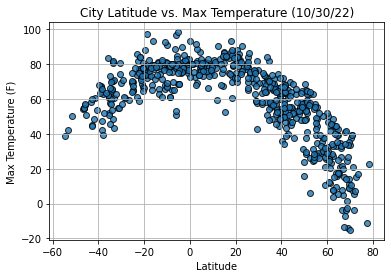

In [23]:
plt.scatter(lat, maxTemp, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("output_data/fig1.png")

plt.show()


## Latitude vs. Humidity Plot

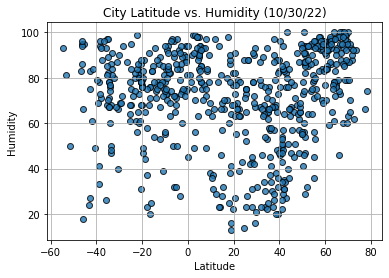

In [24]:
plt.scatter(lat, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.savefig("output_data/fig2.png")

plt.show()


## Latitude vs. Cloudiness Plot

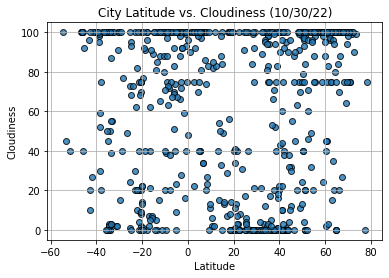

In [25]:
plt.scatter(lat, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("output_data/fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

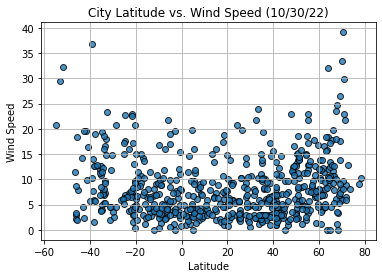

In [26]:
plt.scatter(lat, windSpeed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.savefig("output_data/fig4.png")

plt.show()

## Linear Regression

In [37]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    #plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [38]:
northHemi = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
southHemi = clean_city_data.loc[(clean_city_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7221914447909148


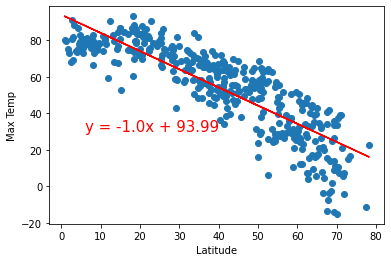

In [40]:
x_values = northHemi["Lat"]
y_values = northHemi["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4508991378395053


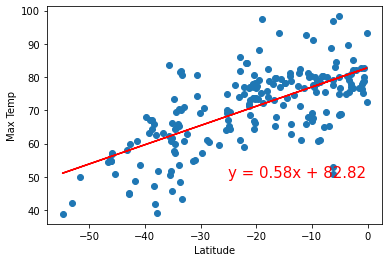

In [47]:
x_values = southHemi["Lat"]
y_values = southHemi["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-25,50))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05595653789565971


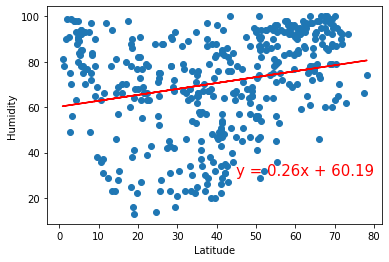

In [49]:
x_values = northHemi["Lat"]
y_values = northHemi["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (45,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.004648157727669544


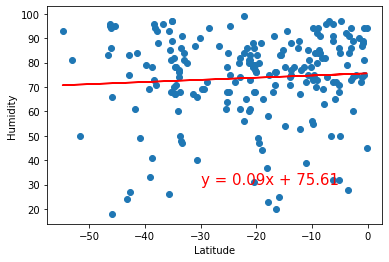

In [44]:
x_values = southHemi["Lat"]
y_values = southHemi["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05510869440776406


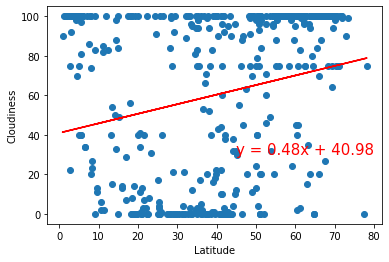

In [53]:
x_values = northHemi["Lat"]
y_values = northHemi["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (45,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0033692129358339623


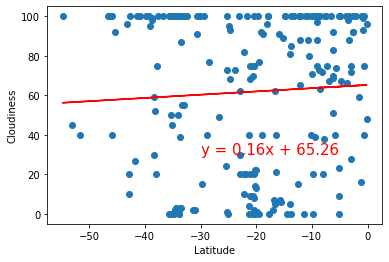

In [52]:
x_values = southHemi["Lat"]
y_values = southHemi["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09795625105606007


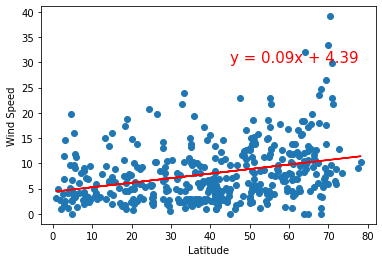

In [54]:
x_values = northHemi["Lat"]
y_values = northHemi["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (45,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11010225910096937


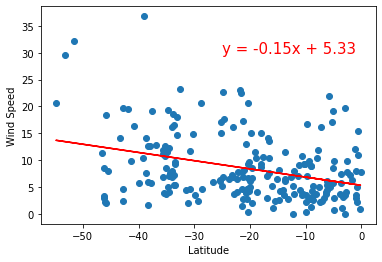

In [56]:
x_values = southHemi["Lat"]
y_values = southHemi["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-25,30))